[*********************100%%**********************]  1 of 1 completed

Mean Squared Error (MSE): 10.20445217956139
Mean Absolute Error (MAE): 2.3522529351083854


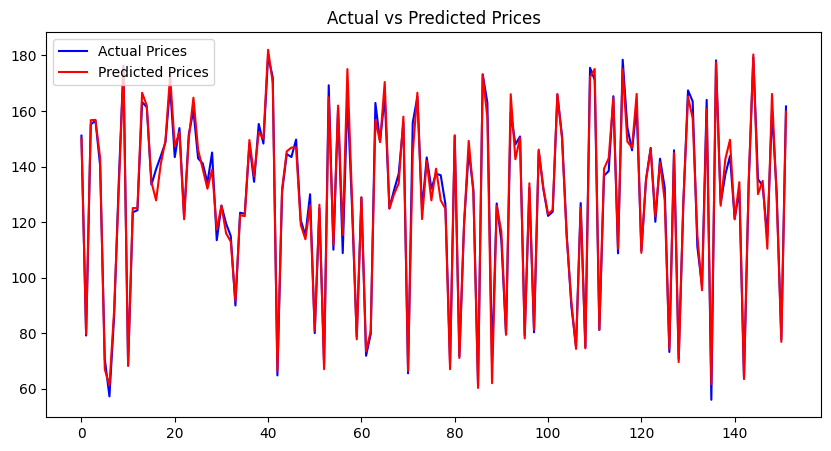

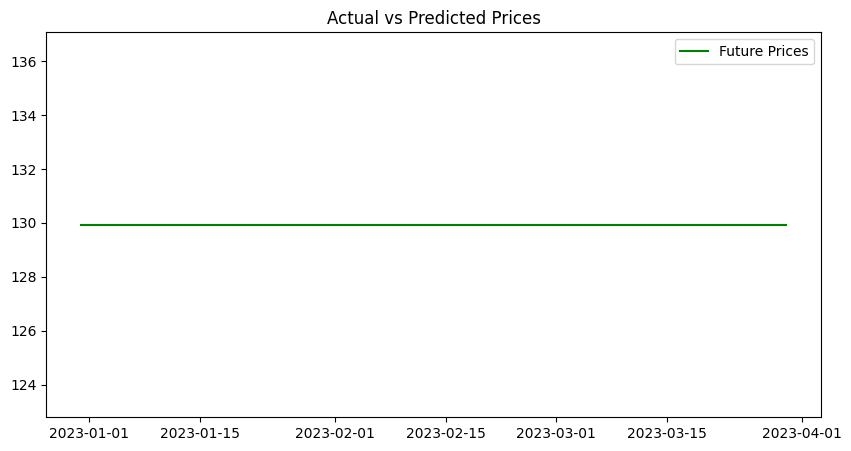

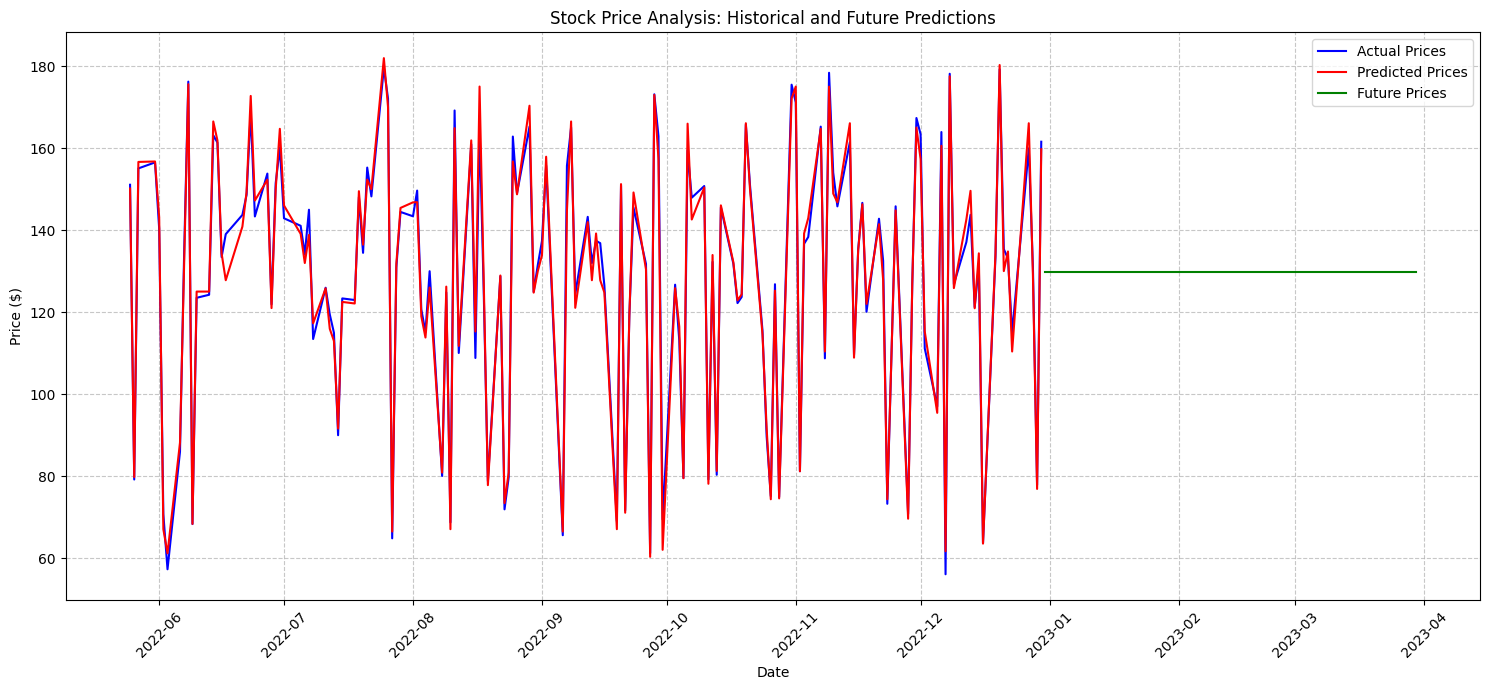

[datetime.datetime(2023, 1, 2, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 1, 4, 0, 0), datetime.datetime(2023, 1, 5, 0, 0)] [129.92999268 129.92999268 129.92999268 129.92999268]
The predicted stock price for 2023-03-30 is $129.93


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from datetime import timedelta

# Step 1: Fetch data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Step 2: Prepare the data
def prepare_data(data):
    data['Date'] = data.index
    data['Date'] = data['Date'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
    features = np.array(data[['Date']])
    targets = np.array(data['Close'])
    return features, targets

# Step 3: Train a Decision Tree model
def train_decision_tree_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return model, X_train, X_test, y_train, y_test, y_pred, scaler

# Step 4: Evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")

# Step 5: Predict future prices
def predict_future_prices(model, scaler, last_date, days=90):
    future_dates = [last_date + timedelta(days=i) for i in range(1, days + 1)]
    future_dates_ordinal = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_dates_scaled = scaler.transform(future_dates_ordinal)
    predicted_prices = model.predict(future_dates_scaled)
    return future_dates, predicted_prices

# Step 6: Plot predictions
def plot_results1(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(y_test)), y_test, label='Actual Prices', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted Prices', color='red')
    #plt.plot(range(len(y_test), len(y_test) + len(future_prices)), future_prices, label='Future Prices', color='green')
    plt.legend()
    plt.title('Actual vs Predicted Prices')
    plt.show()

def plot_results2(future_dates, future_prices):
    plt.figure(figsize=(10, 5))
    #plt.plot(y_test, label='Actual Prices', color='blue')
    #plt.plot(y_pred, label='Predicted Prices', color='red')
    plt.plot(future_dates, future_prices, label='Future Prices', color='green')
    plt.legend()
    plt.title('Actual vs Predicted Prices')
    plt.show()

def plot_combined_results(stock_data, y_test, y_pred, future_dates, future_prices):
    plt.figure(figsize=(15, 7))
    
    # Get the dates corresponding to test data
    test_dates = stock_data.index[-len(y_test):]
    
    # Plot historical data (actual vs predicted)
    plt.plot(test_dates, y_test, label='Actual Prices', color='blue')
    plt.plot(test_dates, y_pred, label='Predicted Prices', color='red')
    
    # Plot future predictions
    plt.plot(future_dates, future_prices, label='Future Prices', color='green')
    
    plt.legend()
    plt.title(f'Stock Price Analysis: Historical and Future Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Example usage
if __name__ == "__main__":
    ticker = 'AAPL'  # Example stock ticker
    start_date = '2020-01-01'
    end_date = '2023-01-01'
    
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    features, targets = prepare_data(stock_data)
    model, X_train, X_test, y_train, y_test, y_pred, scaler = train_decision_tree_model(features, targets)
    evaluate_model(y_test, y_pred)
    
    # Predict future prices
    last_date = stock_data.index[-1].to_pydatetime().replace(tzinfo=None)
    future_dates, future_prices = predict_future_prices(model, scaler, last_date, days=90)
    
    # Plot results
    plot_results1(y_test, y_pred)
    plot_results2(future_dates, future_prices)
    plot_combined_results(stock_data, y_test, y_pred, future_dates, future_prices)
    
    # Print future prices
    print(future_dates[2:6], future_prices[2:6])
    print(f"The predicted stock price for {future_dates[-1].strftime('%Y-%m-%d')} is ${future_prices[-1]:.2f}")
